In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Лабораторная работа № 9.

**ЦПХ** - используемое ПАВ (цетилпиридиния хлорид)

$C_{ЦПХ}=2.0*10^{-3}$ M

In [2]:
# Constants

C = 2.0 * 1e-3 # M

sigma_h2o = 0.073 # N / m

In [3]:
concentration = pd.read_csv('9v.csv', index_col='№')
concentration['C (M)'] = C * concentration['V_ПАВ']/20

tensiometry = pd.read_csv('9t.csv')
tensiometry = tensiometry.mean(axis=1)

conductometry = pd.read_csv('9c.csv')

data = pd.concat([concentration['C (M)'], tensiometry, conductometry], axis=1, ignore_index=True)
data.columns = ['C (M)', 'h (cm)', 'X (mS/sm)']

data['sigma (N/m)'] = sigma_h2o * data['h (cm)'] / data['h (cm)'].iloc[0]

data

,C (M),h (cm),X (mS/sm),sigma (N/m)
0,0.00000,19.900000,0.8,0.073000
1,0.00005,19.133333,4.3,0.070188
2,0.00010,18.400000,11.0,0.067497
3,0.00020,17.066667,20.8,0.062606
4,0.00040,14.966667,40.4,0.054903
5,0.00060,13.800000,56.5,0.050623
6,0.00080,12.233333,76.2,0.044876
7,0.00090,11.366667,86.0,0.041697
8,0.00100,10.566667,94.8,0.038762
9,0.00115,10.000000,102.8,0.036683


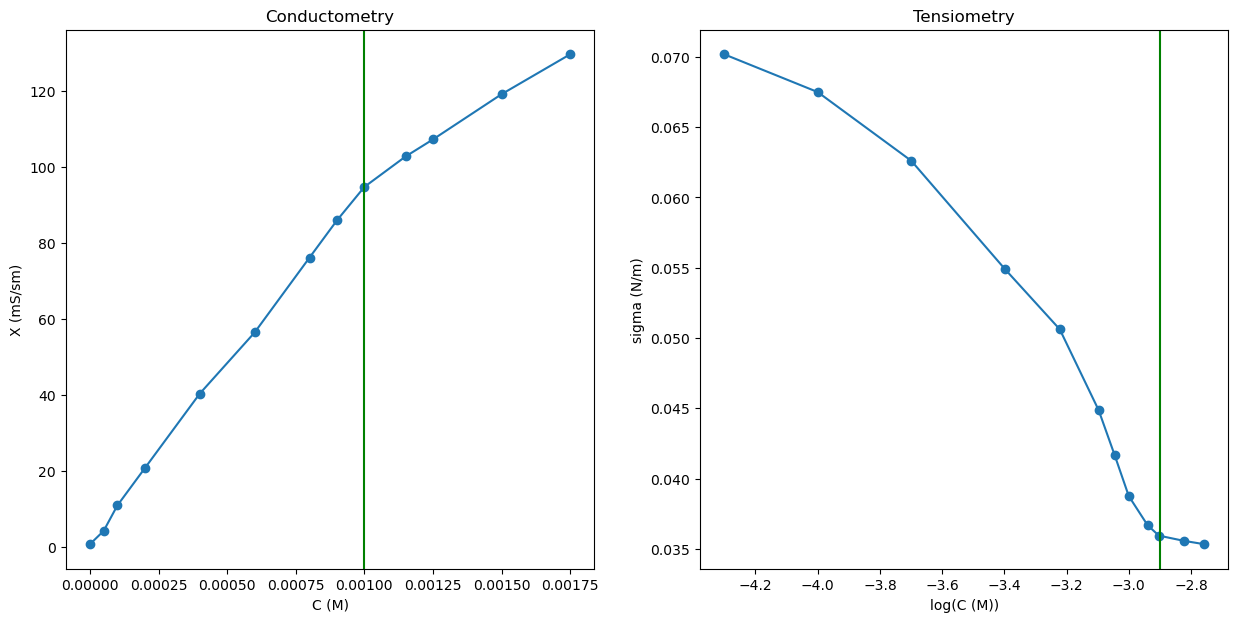

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

# Conductometry
ax[0].plot(data['C (M)'], data['X (mS/sm)'], marker='o')
ax[0].set_title('Conductometry')
ax[0].set_xlabel('C (M)')
ax[0].set_ylabel('X (mS/sm)')
ax[0].axvline(x=1e-3, color='green')

ax[1].plot(np.log10(data['C (M)'][1:]), data['sigma (N/m)'][1:], marker='o')
ax[1].set_title('Tensiometry')
ax[1].set_xlabel('log(C (M))')
ax[1].set_ylabel('sigma (N/m)')
ax[1].axvline(x=-2.9, color='green')

plt.show()

#### Кондуктометрия $C_{ККМ}=10^{-3}$ M

#### Тензиометрия $C_{ККМ}=10^{-2.9}$ M

#### $\Delta G=RT(1+\beta)*ln(C_{ККМ}/k_{0})$

#### $\Delta G=-45084$ Дж

In [14]:
G = 8.314*1.7*292*np.log(0.001/(0.002+55.5))
G

np.float64(-45084.82780357924)